In [1]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
import seaborn as sns

### Reading the root file

In [3]:
file=uproot4.open("testpi.root")


tree= file["events"]

entries=tree.num_entries

print(f"Total entries is {entries}")

Total entries is 5000


In [4]:
pos_x= tree['ForwardTRDHits/ForwardTRDHits.position.x'].array()
pos_y= tree['ForwardTRDHits/ForwardTRDHits.position.y'].array()
pos_z= tree['ForwardTRDHits/ForwardTRDHits.position.z'].array()
ene= tree['ForwardTRDHits/ForwardTRDHits.energyDeposit'].array()*(10**6)

truth_x= tree['ForwardTRDHits/ForwardTRDHits.truth.x'].array()
truth_y= tree['ForwardTRDHits/ForwardTRDHits.truth.y'].array()
truth_z= tree['ForwardTRDHits/ForwardTRDHits.truth.z'].array()
truth_ene= tree['ForwardTRDHits/ForwardTRDHits.truth.deposit'].array()*(10**6)


flat_posX=ak.flatten(pos_x)
flat_posY=ak.flatten(pos_y)
flat_posZ=ak.flatten(pos_z)
flat_ene=ak.flatten(ene) #to keV

flat_truX=ak.flatten(truth_x)
flat_truY=ak.flatten(truth_y)
flat_truZ=ak.flatten(truth_z)
flat_truene=ak.flatten(truth_ene) #to keV

### Plotting 2d histograms 

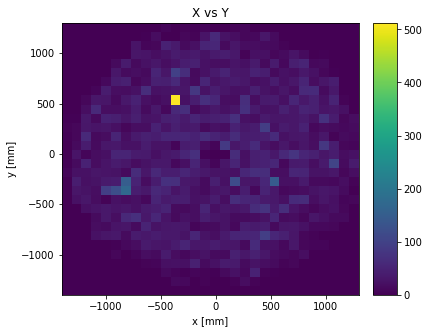

In [40]:
#X vs Y
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(30, -1400, 1300, name="X", label="x [mm]", flow=False),
    hist.axis.Regular(30,-1400, 1300, name="Y", label="y [mm]", flow=False),
)


h.fill(flat_posX,flat_posY)
h.plot()
plt.title("X vs Y")
plt.show()

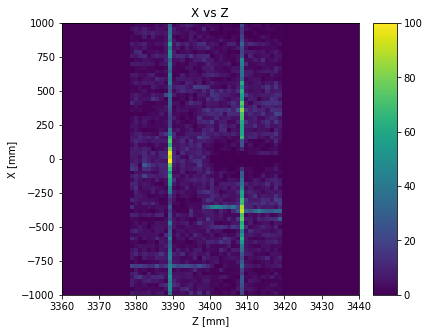

In [7]:
# X vs Z
# Note:- The dark yellow point in the graph indictaes that the frequency of that particular point is highest 
# (800 in this case)

plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(70, 3360, 3440, name="Z", label="Z [mm]", flow=False),
    hist.axis.Regular(70,-1000, 1000, name="X", label="X [mm]", flow=False),
)

h.fill(flat_posZ,flat_posX)
h.plot()
plt.title("X vs Z")
plt.show()

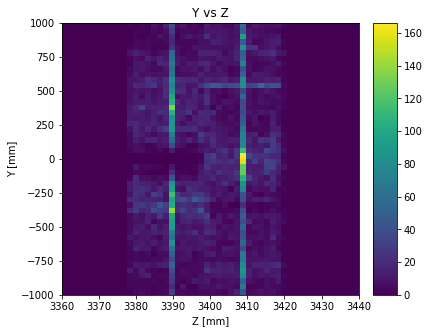

In [8]:
# Y vs Z
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(50, 3360, 3440, name="Z", label="Z [mm]", flow=False),
    hist.axis.Regular(50,-1000, 1000, name="Y", label="Y [mm]", flow=False),
)

h.fill(flat_posZ,flat_posY)
h.plot()
plt.title("Y vs Z")
plt.show()

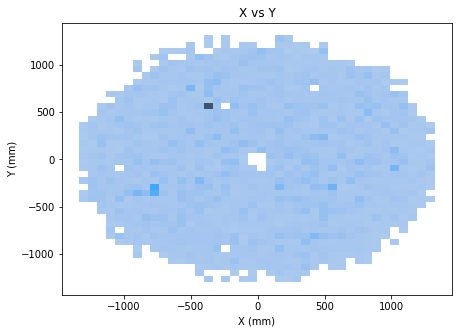

In [12]:
# Using Seaborn library
#X vs Y

plt.figure(figsize=(7,5))
sns.histplot(x=flat_posX,y=flat_posY,bins=40)
plt.title("X vs Y")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()


### Position in Z direction

The two peaks corresponds to the entry and exit of the particle in the 20mm drift chamber

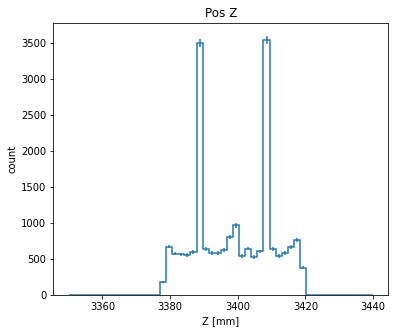

In [13]:
# position Z 
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(50, 3350, 3440, name="Z", label="Z [mm]", flow=False),)

h.fill(flat_posZ)
h.plot()
plt.ylabel('count')
plt.title("Pos Z")
plt.show()

### Histograms for momentum in Z direction

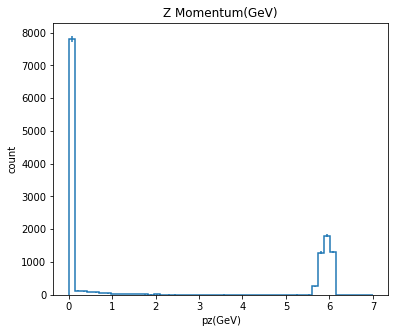

In [14]:
# Z momentum 
mom_z=tree['ForwardTRDHits/ForwardTRDHits.momentum.z'].array()
flat_momZ=ak.flatten(mom_z)

plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(50, 0, 7, name="pz(GeV)", label="pz(GeV)", flow=False),)

h.fill(flat_momZ)
h.plot()
plt.ylabel('count')
plt.title("Z Momentum(GeV)")
plt.show()

                                                    Drift chamber

<center><img src="driftChamber.jpeg" height="500px" width="300"></center>

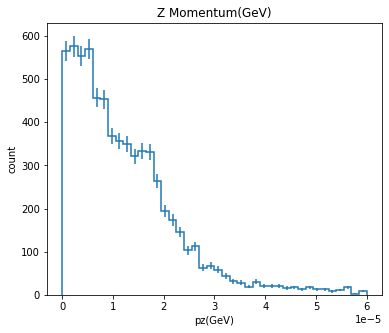

In [15]:
# Z momentum (Zoomed)


plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(40, 0, 0.00006, name="pz(GeV)", label="pz(GeV)", flow=False),)
# 0 - 60KeV

h.fill(flat_momZ)
h.plot()
plt.ylabel('count')
plt.title("Z Momentum(GeV)")
plt.show()

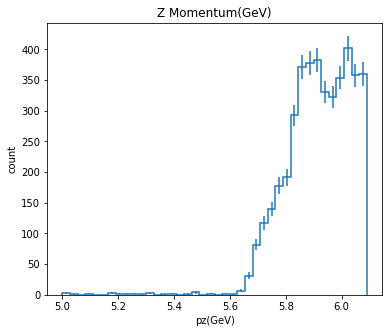

In [18]:
# Z momentum (Zoomed)
plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(40, 5, 6.09, name="pz(GeV)", label="pz(GeV)", flow=False),)

h.fill(flat_momZ)
h.plot()
plt.ylabel('count')
plt.title("Z Momentum(GeV)")
plt.show()

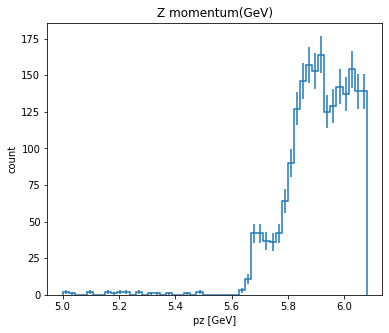

In [21]:

# Removing the noise by masking
bool_mask = pos_z > 3400
masked_momZ = mom_z[bool_mask]

plt.figure(figsize=(6,5))
mom_hst = Hist(hist.axis.Regular(50, 5, 6.08, name="pz [GeV]", label="pz [GeV]", underflow=False, overflow=False),)
mom_hst.fill(ak.flatten(masked_momZ))
mom_hst.plot()
plt.title("Z momentum(GeV)")
plt.ylabel("count")
plt.show()


### Histograms for Energy Deposit

In [22]:
max(flat_ene)

2047.3853492987562

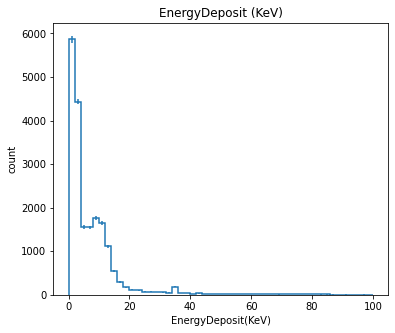

In [23]:
#Energy Deposit
plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(50, 0, 100, name="EnergyDeposit(KeV)", label="EnergyDeposit(KeV)", flow=False),)

h.fill(flat_ene)
h.plot()
plt.ylabel('count')
plt.title("EnergyDeposit (KeV)")
plt.show()

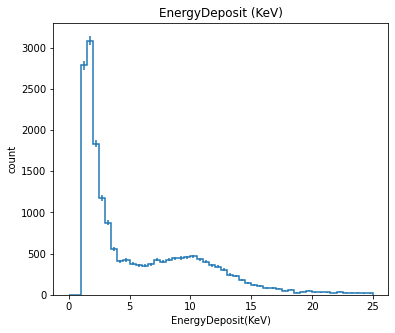

In [24]:
#EnergyDeposit(zoomed)
plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(50, 0, 25, name="EnergyDeposit(KeV)", label="EnergyDeposit(KeV)", flow=False),)

h.fill(flat_ene)
h.plot()
plt.ylabel('count')
plt.title("EnergyDeposit (KeV)")
plt.show()

### Weighted histograms

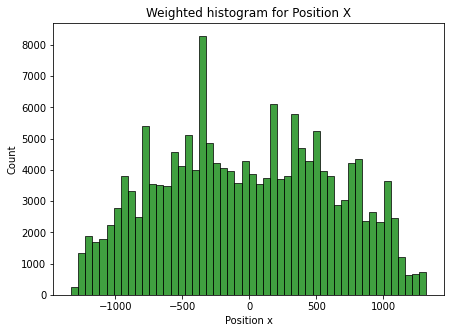

In [25]:
# Pos X
# Energy is in KeV
plt.figure(figsize=(7,5))
sns.histplot(x=flat_posX,bins=50,weights=flat_ene,color="g")
plt.title("Weighted histogram for Position X")
plt.xlabel("Position x")
plt.show()

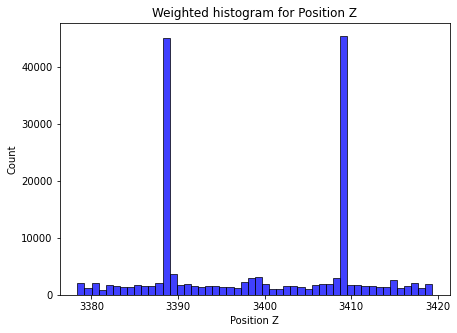

In [26]:
# Pos Z
plt.figure(figsize=(7,5))
sns.histplot(x=flat_posZ,bins=50,weights=flat_ene,color="b")
plt.title("Weighted histogram for Position Z")
plt.xlabel("Position Z")
plt.show()

### Checking difference between truthXYZ,deposit and posXYZ,ene 

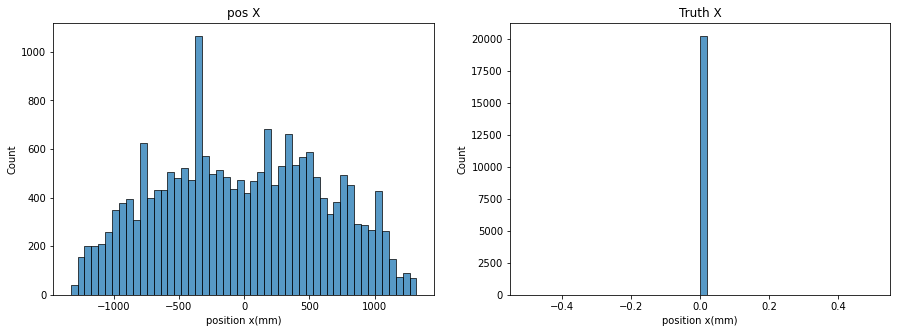

In [27]:
# pos X and truth X
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=flat_posX,bins=50)
plt.xlabel("position x(mm)")
plt.title("pos X")
plt.subplot(1,2,2)
sns.histplot(x=flat_truX,bins=50)
plt.title("Truth X")
plt.xlabel("position x(mm)")
plt.show()

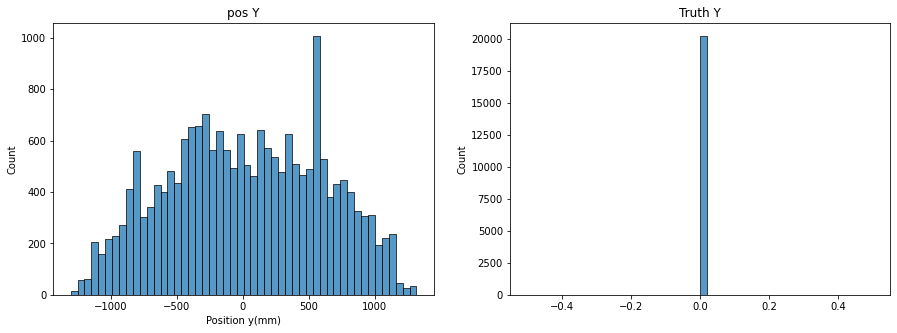

In [28]:
# pos Y and truth Y
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=flat_posY,bins=50)
plt.xlabel("Position y(mm)")
plt.title("pos Y")
plt.subplot(1,2,2)
sns.histplot(x=flat_truY,bins=50)
plt.title("Truth Y")
plt.show()

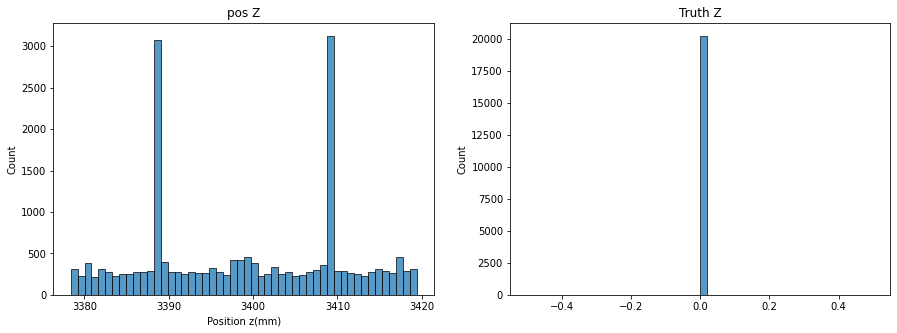

In [29]:
# pos Z and truth Z
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=flat_posZ,bins=50)
plt.xlabel("Position z(mm)")
plt.title("pos Z")
plt.subplot(1,2,2)
sns.histplot(x=flat_truZ,bins=50)
plt.title("Truth Z")
plt.show()

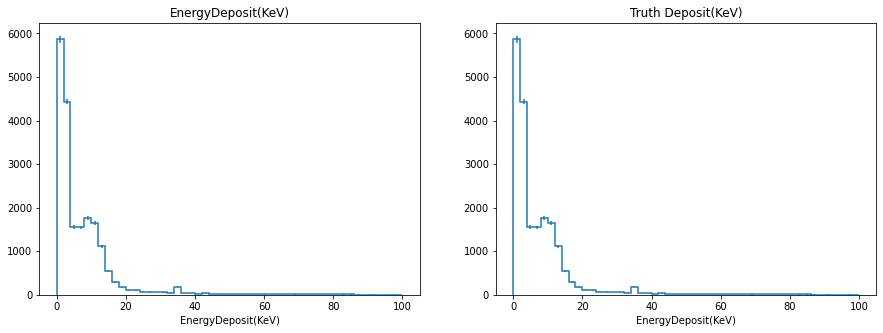

In [30]:
# energyDeposit and truth deposit
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
h = Hist(hist.axis.Regular(50, 0, 100, name="EnergyDeposit(KeV)", label="EnergyDeposit(KeV)", flow=False),)
h.fill(flat_ene)
h.plot()
plt.title("EnergyDeposit(KeV)")

plt.subplot(1,2,2)
h = Hist(hist.axis.Regular(50, 0, 100, name="EnergyDeposit(KeV)", label="EnergyDeposit(KeV)", flow=False),)
h.fill(flat_truene)
h.plot()
plt.title("Truth Deposit(KeV)")
plt.show()

### EnergyDeposit vs Z

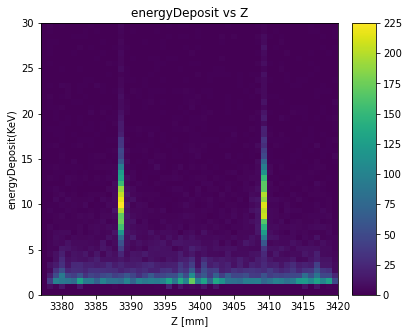

In [31]:
#energyDeposit vs Z
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(50,3377, 3420, name="Z", label="Z [mm]", flow=False),
    hist.axis.Regular(50, 0, 30, name="energyDeposit(KeV)", label="energyDeposit(KeV)", flow=False),
)
h.fill(flat_posZ,flat_ene)
h.plot()
plt.title("energyDeposit vs Z")
plt.show()

### EnergyDeposit vs Z  , Z vs X for a single particle 

In [32]:
pos_z1=(pos_z[2])

In [33]:
print(pos_z1)

[3.39e+03]


In [34]:
ene1=ene[2]

In [35]:
print(ene1)

[10.2]


In [36]:
pos_x1=pos_x[2]

In [37]:
print(pos_x1)

[874]


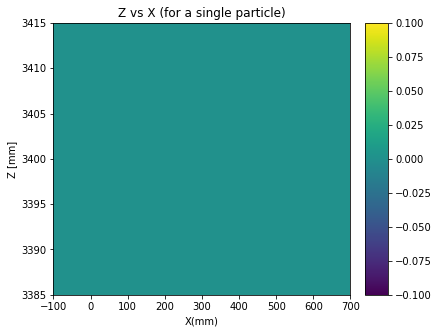

In [38]:
#energyDeposit vs Z
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(50, -100, 700, name="X", label="X(mm)", flow=False),
    hist.axis.Regular(50,3385, 3415, name="Z", label="Z [mm]", flow=False),
)
h.fill(pos_x1,pos_z1)
h.plot()
plt.title("Z vs X (for a single particle)")
plt.show()

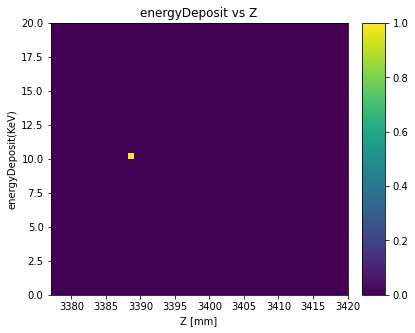

In [39]:
#energyDeposit vs Z
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(50,3377, 3420, name="Z", label="Z [mm]", flow=False),
    hist.axis.Regular(50, 0, 20, name="energyDeposit(KeV)", label="energyDeposit(KeV)", flow=False),
)
h.fill(pos_z1,ene1)
h.plot()
plt.title("energyDeposit vs Z")
plt.show()